# Evaluación de modelos (ejercicio)

**Autor**: Sergio Rodríguez Calvo

### **Importante: comentar adecuadamente cada paso realizado**, relacionándolo con lo visto en la teoría.

Para este ejercicio usaremos de nuevo los datos de cáncer de mama que están accesibles en scikit-learn.

In [1]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

## Parte 1: validación cruzada estratificada

Se pide implementar una funcion `mi_cross_val_f1` que aplique validación cruzada con $k$ particiones estratificadas, y que use **$F_1$ como métrica**. Similar a la función `cross_val_score`, pero específicamente con particiones estratificadas y métrica $F_1$, **y obviamente sin usar `cross_val_score`**.  

En concreto, la función debe tener los siguientes argumentos de entrada, `mi_cross_val_f1`*(modelo,X,y,n_splits=5,clase_positiva=1)*, donde:

- *modelo* es un un clasificador (en particular, un objeto de una clase que tenga métodos `fit` y `predict`).
- *X* es un array con los datos.
- *y* es un array con la clasificación (binaria) de los datos anteriores.
- *n_splits* es el número de particiones en la validación cruzada. Por defecto es 5.
- *clase_positiva* la clase que se ha considerar como positiva cuando se calcule la métrica $F_1$. Por defecto es 1. Nótese que al calcular la métrica $F_1$ debemos saber qué clase es la que se considera como positiva.  

Debe devolver una lista o array con *n_splits* números, los resultados de las *n_splits* evaluaciones de la métrica $F_1$ que se realizan al aplicar validación cruzada con *n_splits* particiones estratificadas. 

**Nota**: no se puede usar `cross_val_score`, pero se debe usar `f1_score`y la clase `StratifiedKFold` (consultar la documentación de ambas)

**Ejemplos**:

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=0)

from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(solver="liblinear")


# mi_cross_val_f1(logreg,X_train,y_train) devuelve:

#[0.9629629629629629,
# 0.9541284403669724,
# 0.9320388349514563,
# 0.9814814814814815,
# 0.9724770642201834]

# mi_cross_val_f1(logreg,X_train,y_train,n_splits=10) devuelve:

#[0.9818181818181818,
# 0.9433962264150944,
# 0.9433962264150944,
# 0.9642857142857143,
# 0.9433962264150944,
# 0.9629629629629629,
# 0.9818181818181818,
# 0.9811320754716981,
# 0.9811320754716981,
# 0.962962962962963]

# mi_cross_val_f1(logreg,X_train,y_train,n_splits=10,clase=0)

#[0.967741935483871,
# 0.9090909090909091,
# 0.9090909090909091,
# 0.9333333333333333,
# 0.9090909090909091,
# 0.9375,
# 0.967741935483871,
# 0.967741935483871,
# 0.967741935483871,
# 0.9285714285714286]

Vamos a definir la función tal y como se ha indicado, para ello vamos a hacer uso de `StratifiedKFold`, la cual nos va a dar las particiones que indiquemos con `n_splits`. En realidad, nos va a devolver los rangos para los ejemplos que vamos a considerar de entrenamiento y prueba. Para cada una de estas particiones, vamos a realizar un entrenamiento y una predicción.

Vamos a comparar la predicción con los resultados esperando usando la métrica F1 vista en teoría. Finalmente, devolvemos las puntuaciones como array de Numpy.

In [3]:
# Definr aquí mi_cross_val_f1

import numpy as np

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score

def mi_cross_val_f1(modelo,X,y,n_splits=5,clase_positiva=1):
    scores = []
    skf = StratifiedKFold(n_splits=n_splits)
    
    for train_range, test_range in skf.split(X, y):
        X_train, X_test = X[train_range], X[test_range]
        y_train, y_test = y[train_range], y[test_range]
    
        y_predict = modelo.fit(X_train, y_train).predict(X_test)
        
        score = f1_score(y_test, y_predict, pos_label=clase_positiva)
        scores.append(score)

    return np.asarray(scores)

Vamos a ejecutar la función que hemos definido y comparar cada ejecución con su equivalente de la función `cross_val_score`. Vamos a usar el módulo de Numpy llamado `numpy.testing`, en concreto, el método `assert_array_equal`. Si la ejecución va correctamente, no veremos ningún mensaje, sólo que la celda del cuaderno de Jupyter se ha ejecutado correctamente y ha pasado a la siguiente.

**Nota**: hago esto porque los resultados difieren de los propuesto arriba como ejemplos. Debe haber cambiado la librería en estos últimos años y el resultado ya no es ese. Hace falta actualizar esa celda del cuaderno.

In [4]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer,f1_score
import numpy.testing as testing

result = mi_cross_val_f1(logreg,X_train,y_train)
origin = cross_val_score(logreg,X_train,y_train,scoring=make_scorer(f1_score),cv=5)
testing.assert_array_equal(result, origin)

In [5]:
result2 = mi_cross_val_f1(logreg,X_train,y_train,n_splits=10)
origin2 = cross_val_score(logreg,X_train,y_train,scoring=make_scorer(f1_score),cv=10)
testing.assert_array_equal(result2, origin2)

In [6]:
result3 = mi_cross_val_f1(logreg,X_train,y_train,n_splits=10,clase_positiva=0)
origin3 = cross_val_score(logreg,X_train,y_train,scoring=make_scorer(f1_score,pos_label=0),cv=10)
testing.assert_array_equal(result3, origin3)

Hemos ejecutado los tres ejemplos propuestos y todo ha ido correctamente porque obtenemos el mismo resultado.

**Nota**: Se ha comentado las siguientes celdas de este ejercicio porque ya se hace la ejecución durante el ejercicio.

Se puede comprobar que los tres ejemplos anteriores efectivamente coinciden con lo que devuelve `cross_val_score`:

In [7]:
# from sklearn.model_selection import cross_val_score
# from sklearn.metrics import make_scorer,f1_score

In [8]:
# cross_val_score(logreg,X_train,y_train,scoring=make_scorer(f1_score),cv=5)

In [9]:
# cross_val_score(logreg,X_train,y_train,scoring=make_scorer(f1_score),cv=10)

In [10]:
# cross_val_score(logreg,X_train,y_train,scoring=make_scorer(f1_score,pos_label=0),cv=10)

## Parte 2: evaluación de modelos para datos del cáncer de mama

En esta parte supondremos que queremos encontrar un buen modelo para clasificación en el caso del cáncer de mama. Nos restingiremos a dos familias de clasificadores:

1. **SGDClassifier** con *loss="log"*. Es decir, regresión logística mediante descenso por el gradiente. 
2. **SVC**, máquina de vectores soporte con kernels.

En los datos del cáncer de mama, la clase 0 se corresponde con *maligno* y la clase 1 se corresponde con *benigno*. Supondremos también en esta sección que estamos interesado principalmente en el rendimiento sobre la detección del cáncer. Es decir, consideremos *maligno* como la clase positiva.

**Nota importante**: la clase positiva por defecto en scikit-learn es 1, y en este caso queremos considerar la clase 0 como la positiva. Para ello tenemos dos opciones:

- Usar el parámetro `pos_label` en las distintas funciones que usemos.
- Hacer una transformación inicial de las clases, para poner el 1 como 0 y el 0 como 1. Eso se consigue fácilmente haciendo `1-cancer.target`

Vamos a obtener el conjunto de datos y a realizar una partición en dos conjuntos, uno de entrenamiento y otro de prueba. Vamos a utilizar `1-cancer.target` para invertir el valor de clasificación, que al tratarse de una clasificación binaria, el 0 pasará a ser el 1 y viceversa. También, vamos a hacer lo propio con las etiquetas de las clases (maligno y benigno).

In [11]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, 1-cancer.target, test_size=0.3, random_state=7)

In [12]:
target_names = np.flip(cancer.target_names)

### 2.1 *Grid Search* con validación cruzada



Aplicar `GridSearchCV` para ajustar hiperparámetros de los modelos `SGDClassifier`y `SVC`, aplicados al conjunto de datos del cáncer de mama.  En lugar de tratar de optimizar la tasa de aciertos, tratar de optimizar la métrica $F_1$ calculada considerando que los ejemplos de tumor "maligno" son los positivos. 

Tratar de encontrar valores optimos solo para aquellos hiperparámetos del modelo que te sean familiares y para valores de los que conozcas el significado. Probar con distintas rejillas. 

Una vez ajustados los dos modelos, dar para ambos:

- La tasa de aciertos, tanto en el conjunto de entrenamiento como en el de prueba.
- Matriz de confusión, tanto en entrenamiento como en prueba.
- *Classification report*, tanto para entrenamiento como para prueba. 

Interpretar los resultados. 


En primer lugar, vamos a realizar la optimización para `SGDClassifier`, un modelo de clasificación lineal por lo que tenemos que ajustar los parámetros:
* Constante para multiplicar el término de regularización o `alpha`
* Función de pérdida o `loss`
* Regularización o `penalty`
* Número máximo de iteraciones

**Nota**: Fijamos el mismo número de iteraciones que para SVC ya que el modelo tarda bastante en ejecutarse y he decidido fijar esa cantidad.

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier

param_grid = { 
    'alpha': [0.001, 0.01, 0.1, 1, 10],
    'loss':  ['hinge', 'log', 'modified_huber'],
    'penalty' : ['none', 'l1', 'l2',],
    'max_iter': [1000]
}

gscv_sdgc = GridSearchCV(SGDClassifier(), param_grid=param_grid, cv=5, return_train_score=True).fit(X_train, y_train)
y_predict = gscv_sdgc.predict(X_test)
f1 = f1_score(y_test, y_predict)
score = gscv_sdgc.score(X_test, y_test)

print('SGDClassifier F1: {:.3f}'.format(f1))
print('SGDClassifier score: {:.3f}'.format(score))

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_grad

SGDClassifier F1: 0.840
SGDClassifier score: 0.889


/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Hemos obtenido un rendimiento sobre el conjunto de prueba de `0.889`, pero su F1 ha sido de `0.840`. Como hemos visto en teoría, F1 combina _precision_ y _recall_ dando su media armónica, esto es dar mayor peso a la cantidad más pequeña.

Estamos dando, por tanto, una métrica mucho más precisa que utilizando simplemente `score`.

Ahora vamos a mostrar la matriz de confusión, donde podemos ver TP y TF respectivamente sobre la diagonal principal, dejando FN y FP en la diagonal contraria.

<AxesSubplot:>

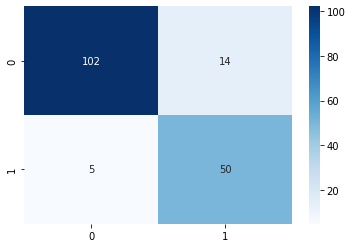

In [14]:
import seaborn as sn
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predict)

sn.heatmap(cm, annot=True, cmap='Blues', fmt='g')

Son pocos los que han sido mal clasificados, pero está bien conocer cuántos y en qué proporcion. 

A continuación, vamos a mostrar el reporte de clasificación que nos mostrará los valores para _precision_, _recall_ y _F1_.

In [15]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict, target_names=target_names))

              precision    recall  f1-score   support

      benign       0.95      0.88      0.91       116
   malignant       0.78      0.91      0.84        55

    accuracy                           0.89       171
   macro avg       0.87      0.89      0.88       171
weighted avg       0.90      0.89      0.89       171



Con _precision_ medimos la calidad del modelo y con _recall_ medimos la exhaustividad o la cantidad que el modelo es capaz de identificar. Esto es, respectivamente:
* El `0.96` de los canceres clasificados como malignos, son efectivamente malignos. Lo cual, tenemos un valor bastante alto, por lo que está bien.
* Sin embargo, el porcentaje de canceres malignos que somos capaces de identificar es de `0.78`, lo cual es mejorable.

Vemos como obtenemos una F1 de `0.84` para la clase maligno, lo que es mejorable.

Vamos a repetir el experimento utilizando el modelo `SVC`. Es decir, clasificación por soporte de vectores. Los parámetros a configurar son:
* Parámetro de regularización o `C`
* Tipo de `kernel`
* Coeficiente del `kernel` o `gamma`
* Número máximo de iteraciones o `max_iter`, para evitar que el modelo tarde mucho en ejecutarse

In [16]:
from sklearn.svm import SVC

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'gamma': [0.001, 0.01, 0.1, 1, 10],
    'kernel': ['rbf', 'poly'],
    'max_iter': [1000]
}
gscv_svc = GridSearchCV(SVC(), param_grid=param_grid, cv=5, return_train_score=True).fit(X_train, y_train)
y_predict = gscv_svc.predict(X_test)
f1 = f1_score(y_test, y_predict)
score = gscv_svc.score(X_test, y_test)

print('SVC F1: {:.3f}'.format(f1))
print('SGDClassifier score: {:.3f}'.format(score))

/usr/local/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-

SVC F1: 0.881
SGDClassifier score: 0.918


/usr/local/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-

Vamos a mostrar la matriz de confusión.

<AxesSubplot:>

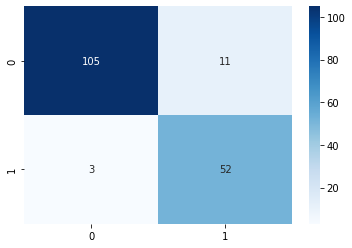

In [17]:
cm = confusion_matrix(y_test, y_predict)

sn.heatmap(cm, annot=True, cmap='Blues', fmt='g')

Al igual que antes, tenemos pocos mal clasificados, aunque en este caso, tenemos más falsos positivos que antes, que era a la inversa (más falsos negativos).

Ejecutamos el reporte de clasificación:

In [18]:
print(classification_report(y_test, y_predict, target_names=target_names))

              precision    recall  f1-score   support

      benign       0.97      0.91      0.94       116
   malignant       0.83      0.95      0.88        55

    accuracy                           0.92       171
   macro avg       0.90      0.93      0.91       171
weighted avg       0.92      0.92      0.92       171



Obtemos unos valores muy similares al modelo anterior.

### 2.2 Curvas *ROC* y *PR*

Comparar ambos modelos construidos en el apartado anterior, dibujando sendas gráficas con las curvas ROC de ambos y con las curvas PR de ambos. Interretar las gráficas y calcular para ambos modelos la precisión media (*average precision*) y el área bajo la curva (*AUC*).

Interpretar los resultados.

In [19]:
import matplotlib.pyplot as plt

En primer lugar, vamos a calcular la curva ROC.

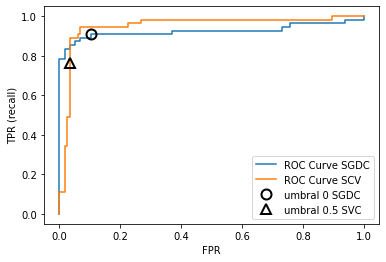

In [20]:
from sklearn.metrics import roc_curve
fpr_sgdc, tpr_sgdc, thresholds_sgdc = roc_curve(y_test, gscv_sdgc.decision_function(X_test))
fpr_scv, tpr_scv, thresholds_scv = roc_curve(y_test, gscv_svc.decision_function(X_test))

plt.plot(fpr_sgdc, tpr_sgdc, label ="ROC Curve SGDC")
plt.plot(fpr_scv, tpr_scv, label ="ROC Curve SCV")

plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
close_zero = np.argmin(np.abs(thresholds_sgdc))
plt.plot(fpr_sgdc[close_zero], tpr_sgdc[close_zero], 'o', markersize=10, label="umbral 0 SGDC", fillstyle="none", c='k', mew=2)
close_default_scv = np.argmin(np.abs(thresholds_scv - 0.5))
plt.plot(fpr_scv[close_default_scv], tpr_scv[close_default_scv], '^', markersize=10, label="umbral 0.5 SVC", fillstyle="none", c='k', mew=2)

plt.legend(loc=4)

Como hemos visto en las métricas anteriores, ambos modelos dan un rendimiento similar, esto lo vamos a ver mejor cuando mostremos el área bajo la curva más adelante.

En siguiente lugar, vamos a calcular la curva PR.

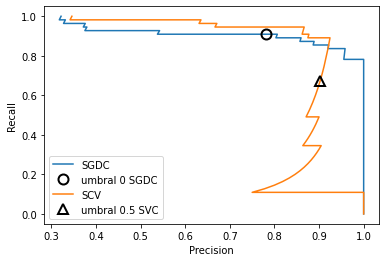

In [21]:
from sklearn.metrics import precision_recall_curve

precision_sgdc, recall_sgdc, thresholds_sgdc = precision_recall_curve(y_test, gscv_sdgc.decision_function(X_test))
precision_scv, recall_scv, thresholds_scv = precision_recall_curve(y_test, gscv_svc.decision_function(X_test))

plt.plot(precision_sgdc, recall_sgdc, label="SGDC")

close_zero = np.argmin(np.abs(thresholds_sgdc))
plt.plot(precision_sgdc[close_zero], recall_sgdc[close_zero], 'o', markersize=10, label="umbral 0 SGDC", fillstyle="none", c='k', mew=2)

plt.plot(precision_scv, recall_scv, label="SCV")

close_default_svc = np.argmin(np.abs(thresholds_scv - 0.5))
plt.plot(precision_scv[close_default_svc], recall_scv[close_default_svc], '^', c='k', markersize=10, label="umbral 0.5 SVC", fillstyle="none", mew=2)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

En la curva ROC buscamos que el modelo esté lo más cerca posible a la esquina superior izquierda, aquí buscamos que esté lo más cercano a la cuva superior derecha. Por tanto, parece que el modelo SGDC es algo mejor que el modélo SVC.

Para finalizar, vamos a calcular el área bajo la curva y la precisión media.

In [22]:
from sklearn.metrics import roc_auc_score
sdgc_auc = roc_auc_score(y_test, gscv_sdgc.decision_function(X_test))
svc_auc = roc_auc_score(y_test, gscv_svc.decision_function(X_test))
print("AUC de SDGC: {:.3f}".format(sdgc_auc))
print("AUC de SVC: {:.3f}".format(svc_auc))

AUC de SDGC: 0.925
AUC de SVC: 0.950


In [23]:
from sklearn.metrics import average_precision_score
ap_sdgc = average_precision_score(y_test, gscv_sdgc.decision_function(X_test))
ap_svc = average_precision_score(y_test, gscv_svc.decision_function(X_test))
print("Precisión media de SDGC: {:.3f}".format(ap_sdgc))
print("Precisión media de SVC: {:.3f}".format(ap_svc))

Precisión media de SDGC: 0.933
Precisión media de SVC: 0.880


Vemos como el modelo SDGC ha obtenido mejor puntuación en cuando a precisión media, pero peor resultado en cuando a área bajo la curva. Aunque son modelos muy parecidos, podemos decir que SDGC es ligeramente mejor y más, tratandose de un problema de detección para el cáncer.